In [45]:
import numpy as np
import glob
import os
%matplotlib inline
from readTRC import readTrc
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
import numpy.polynomial.polynomial as poly

In [46]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [47]:
SPATH = '/Users/austinmcdonald/Desktop/Xenon/Data/100-2/'
PATH = '/Users/austinmcdonald/Desktop/Xenon/100-2/'
folders = glob.glob(PATH+"*/")
folders.sort()
folders

['/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-01_E-080/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-01_E-100/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-01_E-150/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-01_E-200/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-01_E-250/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-01_E-300/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-03_E-080/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-03_E-100/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-03_E-150/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-03_E-200/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-03_E-250/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-03_E-300/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-06_E-080/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-06_E-100/',
 '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-06_E-150/',
 '/Users/austinmcdonald/D

In [48]:
len(folders)

31

In [44]:
CHI = 2
for F in range(0,len(folders)):
    #print(folders[F])
    NAME = folders[F].split('/')[-2]
    print(NAME)
    files = os.listdir(folders[F])
    
    FilesGold   = []
    FilesSignal = []

    for x in range(0,len(files)):
        if int(files[x][1]) ==4 or int(files[x][1]) ==2:
            FilesGold.append(files[x])
        if int(files[x][1]) ==3 or int(files[x][1]) ==1:
            FilesSignal.append(files[x])
            
    X, Y, info = readTrc(folders[F]+FilesSignal[0])
    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    for w in range(0,len(FilesSignal)):

        X, Y, info = readTrc(folders[F]+FilesSignal[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            Yvals += Y
            Xvals += X
            avg   += 1
    MSigY = Yvals/avg
    MSigX = Xvals/avg
    
    
    X, Y, info = readTrc(folders[F]+FilesSignal[0])
    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    #for w in range(0,1100):
    for w in range(0,len(FilesSignal)):

        X, Y, info = readTrc(folders[F]+FilesSignal[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            CC = moving_average((MSigY-Y),1)
            xx = moving_average(X,50)
            chiH = CC**2
            chi = np.sum(chiH)*1000
            if chi <CHI:
                mm.append(chi)
                Yvals += Y
                Xvals += X
                avg   += 1
    SigY = Yvals/avg
    SigX = Xvals/avg
    print("Sig avg",avg)

    
    X, Y, info = readTrc(folders[F]+FilesGold[0])

    avg = 0
    for w in range(0,len(FilesGold)):

        X, Y, info = readTrc(folders[F]+FilesGold[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            Yvals += Y
            Xvals += X
            avg   += 1
    MGolY = Yvals/avg
    MGolX = Xvals/avg
    
    
    X, Y, info = readTrc(folders[F]+FilesGold[0])  
    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0 
    #for w in range(0,1100):
    for w in range(0,len(FilesGold)):
        X, Y, info = readTrc(folders[F]+FilesGold[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            CC = moving_average((MGolY-Y),1)
            xx = moving_average(X,50)
            EE = np.mean(CC)
            chiH = (CC-EE)**2
            chi = np.sum(chiH)*1000
            if chi <CHI:
                mm.append(chi)
                Yvals += Y
                Xvals += X
                avg   += 1
    GolY = Yvals/avg
    GolX = Xvals/avg
    print("Gol avg",avg)


    TriggerTime = find_nearest(SigX,0)
    Trigger     = np.where(SigX==TriggerTime)[0][0]
    baselineS    = np.mean(SigY[0:Trigger])
    baselineG    = np.mean(GolY[0:Trigger])
    data = [(GolX), GolY-baselineG, SigY-baselineS]
    np.savetxt(SPATH+NAME+'.txt',data)
    #print("DONE!")

Xe-100_P-01_E-080
Sig avg 99
Gol avg 99
Xe-100_P-01_E-100
Sig avg 99
Gol avg 100
Xe-100_P-01_E-150
Sig avg 96
Gol avg 99
Xe-100_P-01_E-200
Sig avg 98
Gol avg 98
Xe-100_P-01_E-250
Sig avg 95
Gol avg 98
Xe-100_P-01_E-300
Sig avg 86
Gol avg 95
Xe-100_P-03_E-080
Sig avg 100
Gol avg 100
Xe-100_P-03_E-100
Sig avg 99
Gol avg 99
Xe-100_P-03_E-150
Sig avg 95
Gol avg 99
Xe-100_P-03_E-200
Sig avg 92
Gol avg 98
Xe-100_P-03_E-250
Sig avg 93
Gol avg 100
Xe-100_P-03_E-300
Sig avg 91
Gol avg 98
Xe-100_P-06_E-080
Sig avg 100
Gol avg 100
Xe-100_P-06_E-100
Sig avg 100
Gol avg 100
Xe-100_P-06_E-150
Sig avg 95
Gol avg 97
Xe-100_P-06_E-200
Sig avg 99
Gol avg 100
Xe-100_P-06_E-250
Sig avg 94
Gol avg 100
Xe-100_P-06_E-300
Sig avg 86
Gol avg 96
Xe-100_P-09_E-080
Sig avg 100
Gol avg 100
Xe-100_P-09_E-100
Sig avg 98
Gol avg 100
Xe-100_P-09_E-150
Sig avg 96
Gol avg 100
Xe-100_P-09_E-200
Sig avg 85
Gol avg 98
Xe-100_P-09_E-250
Sig avg 72
Gol avg 99
Xe-100_P-09_E-300
Sig avg 60
Gol avg 97
Xe-100_P-09_E-350
Sig avg 

In [111]:
def FILE_SORTER(files):
    FilesGold   = []
    FilesSignal = []
    for x in range(0,len(files)):
        if int(files[x][1]) ==4 or int(files[x][1]) ==2:
            FilesGold.append(files[x])
        if int(files[x][1]) ==3 or int(files[x][1]) ==1:
            FilesSignal.append(files[x])
            
    FilesGold.sort(); FilesSignal.sort()
    return FilesGold, FilesSignal

def MEAN_WAVEFORM(PATH,files):
    #folders[F]+FilesSignal[0]
    X, Y, info = readTrc(PATH+files[0])
    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    for w in range(0,len(files)):

        X, Y, info = readTrc(PATH+files[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            Yvals += Y
            Xvals += X
            avg   += 1
    MSigY = Yvals/avg
    MSigX = Xvals/avg
    return MSigX,MSigY

def WAVEFORM_QUALITY(PATH,files,MEAN,CHI):
    
    X, Y, info = readTrc(PATH+files[0])
    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    #for w in range(0,1100):
    for w in range(0,len(files)):

        X, Y, info = readTrc(PATH+files[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            A = moving_average(MEAN,10)
            B = moving_average(Y   ,10)
            D = moving_average(X   ,10)
            TriggerTime = find_nearest(D,0)
            Trigger     = np.where(D==TriggerTime)[0][0]
            As    = np.mean(A[0:Trigger])
            Bs    = np.mean(B[0:Trigger])
            
            holder = ((A-As)-(B-Bs))**2
            chi = np.sum(holder)*1e4
            if chi <CHI:
                Yvals += Y
                Xvals += X
                avg   += 1
        SigY = Yvals/avg
        SigX = Xvals/avg
    return SigX,SigY

In [77]:
FG,FS = FILE_SORTER(files)

In [78]:
Mx,My = MEAN_WAVEFORM(folders[F],FG)

In [144]:
FOLD = '100/'
SPATH = '/Users/austinmcdonald/Desktop/XeAr/Data/'+FOLD
PATH = '/Users/austinmcdonald/Desktop/XeAr/'+FOLD
folders = glob.glob(PATH+"*/")
folders.sort()
#folders

In [145]:
CHI = 1
for F in range(0,len(folders)):
#for F in [0]:
    NAME = folders[F].split('/')[-2]
    print(NAME)
    files = os.listdir(folders[F])
    FG,FS = FILE_SORTER(files)
    Mx,MEAN = MEAN_WAVEFORM(folders[F],FG)
    Gx,Gy = WAVEFORM_QUALITY(folders[F],FG,MEAN,CHI)
    
    Mx,MEAN = MEAN_WAVEFORM(folders[F],FS)
    Sx,Sy = WAVEFORM_QUALITY(folders[F],FS,MEAN,CHI)
    
    TriggerTime = find_nearest(Sx,0)
    Trigger     = np.where(Sx==TriggerTime)[0][0]
    baselineS    = np.mean(Sy[0:Trigger])
    baselineG    = np.mean(Sy[0:Trigger])
    data = [Gx, Gy-baselineG, Sy-baselineS]
    np.savetxt(SPATH+NAME+'.txt',data)

Xe-100_P-01_E-080
Xe-100_P-01_E-100


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in true_divide


Xe-100_P-01_E-150
Xe-100_P-01_E-200
Xe-100_P-01_E-250
Xe-100_P-01_E-300
Xe-100_P-03_E-080
Xe-100_P-03_E-100
Xe-100_P-03_E-150
Xe-100_P-03_E-200
Xe-100_P-03_E-250
Xe-100_P-03_E-300
Xe-100_P-06_E-080
Xe-100_P-06_E-100
Xe-100_P-06_E-150
Xe-100_P-06_E-200
Xe-100_P-06_E-250
Xe-100_P-06_E-300
Xe-100_P-09_E-080
Xe-100_P-09_E-100
Xe-100_P-09_E-150
Xe-100_P-09_E-250
Xe-100_P-09_E-300
Xe-100_P-11_E-100
Xe-100_P-11_E-150
Xe-100_P-11_E-250
Xe-100_P-11_E-300
Xe-100_P-11_E-350


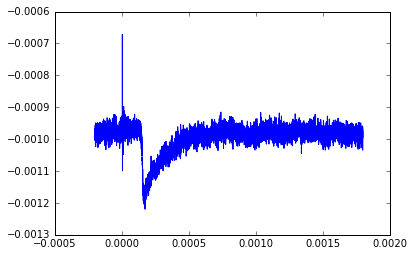

In [128]:
plt.plot(Sx,Sy)

In [136]:
EH = []
CHI = 2
#for F in range(0,len(folders)):
for F in [0]:

#print(folders[F])
    NAME = '/Users/austinmcdonald/Desktop/XeAr/100/Xe-100_P-09_E-200/'.split('/')[-2]
    print(NAME)
    files = os.listdir('/Users/austinmcdonald/Desktop/XeAr/100/Xe-100_P-09_E-200/')
    FG,FS = FILE_SORTER(files)
    Mx,MEAN = MEAN_WAVEFORM('/Users/austinmcdonald/Desktop/XeAr/100/Xe-100_P-09_E-200/',FG)
    
    
    
    X, Y, info = readTrc('/Users/austinmcdonald/Desktop/XeAr/100/Xe-100_P-09_E-200/'+FG[1])
    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    #for w in range(0,1100):
    for w in range(0,len(FS)):

        X, Y, info = readTrc('/Users/austinmcdonald/Desktop/XeAr/100/Xe-100_P-09_E-200/'+FG[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            A = moving_average(MEAN,10)
            B = moving_average(Y   ,10)
            D = moving_average(X   ,10)
            TriggerTime = find_nearest(D,0)
            Trigger     = np.where(D==TriggerTime)[0][0]
            As    = np.mean(A[0:Trigger])
            Bs    = np.mean(B[0:Trigger])
            
            holder = ((A-As)-(B-Bs))**2
            chi = np.sum(holder)*1e4
            print(chi)
            plt.figure(figsize=(6,6))
            plt.plot(D,A-As)
            plt.plot(D,B-Bs)
            plt.show()
        
            EH.append(chi)

            if chi <1:
                mm.append(chi)
                Yvals += Y
                Xvals += X
                avg   += 1
        SigY = Yvals/avg
        SigX = Xvals/avg
            


Xe-100_P-09_E-200


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: operands could not be broadcast together with shapes (0,) (9993,) 

In [139]:
MEAN

array([], dtype=float64)

In [124]:
np.linspace(0,1,10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

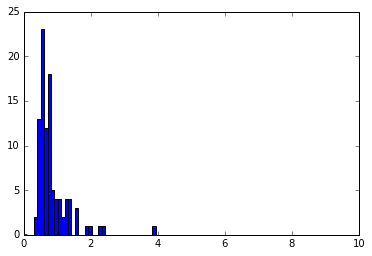

In [125]:
plt.hist(EH,bins=np.linspace(0,10,100))
plt.show()

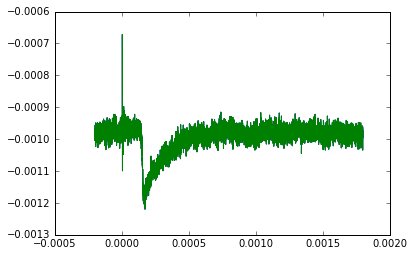

In [129]:
plt.plot(SigX,SigY)
plt.plot(Sx,Sy)

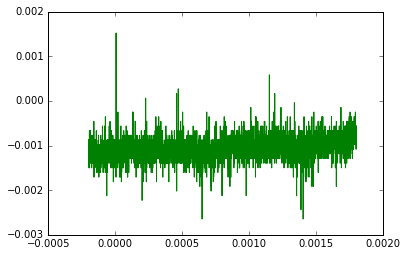

In [185]:
eh = '/Users/austinmcdonald/Desktop/Xenon/100-2/Xe-100_P-11_E-100/C1electron00026.trc'
X, Y, info = readTrc(eh)
plt.plot(X,Y,color='g')


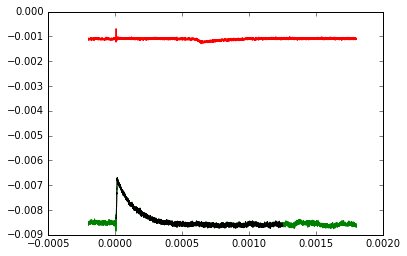

In [197]:
TriggerTime = find_nearest(GolX,0)
Trigger     = np.where(GolX==TriggerTime)[0][0]+35

T2 = find_nearest(GolX,0.00125)
T2 = np.where(GolX==T2)[0][0]
plt.plot(GolX,GolY,color='g')
plt.plot(SigX,SigY,color='r')
plt.plot(GolX[Trigger:T2],GolY[Trigger:T2],color='k')
#plt.xlim(-0.00001,0.00001)

In [ ]:
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+20

In [208]:
Trigger

1034

In [209]:
T2

7249

In [ ]:
[1034:7249]

0.814744994472


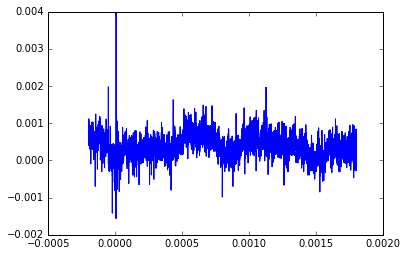

1.87788679061


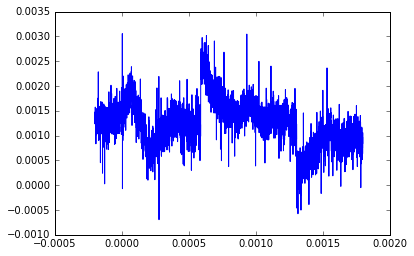

1.09767390708


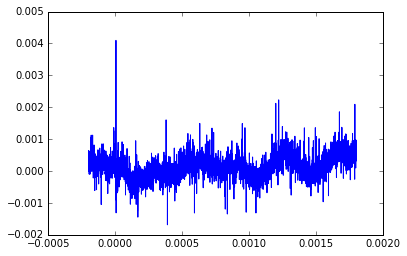

1.16839826278


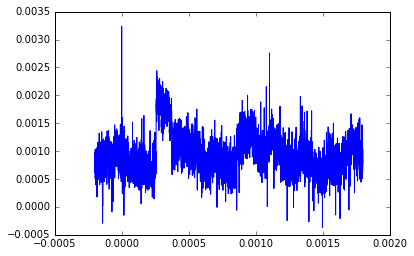

1.05587854255


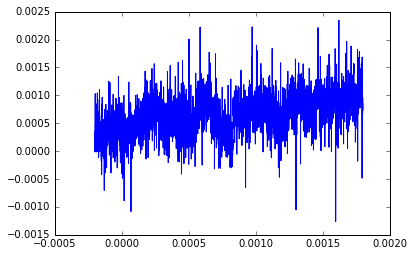

0.884487511708


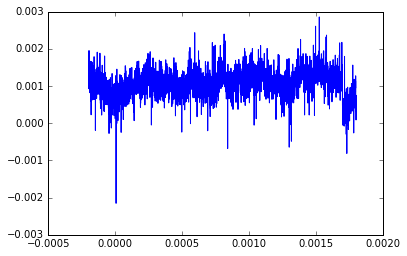

0.858671957727


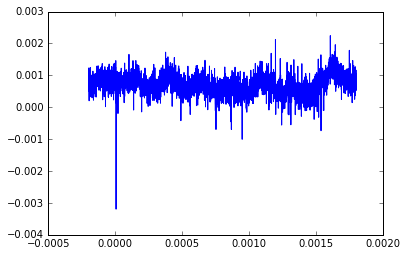

0.75263844664


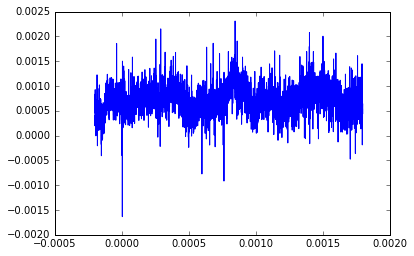

1.02267867495


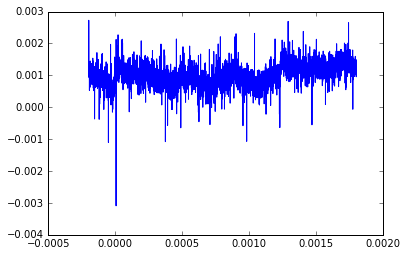

1.10520170595


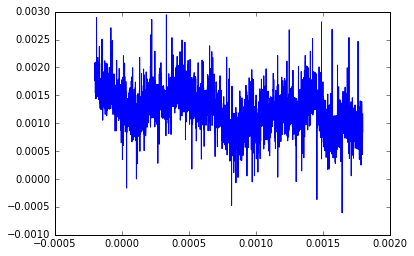

1.74234349212


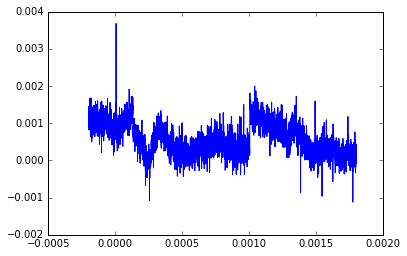

1.51795071538


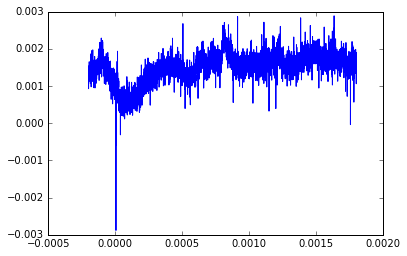

0.934152874081


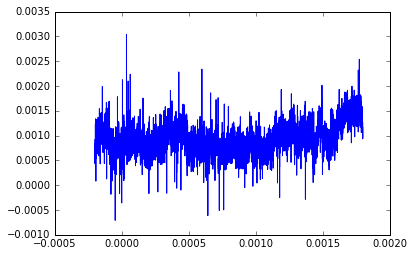

0.948681691152


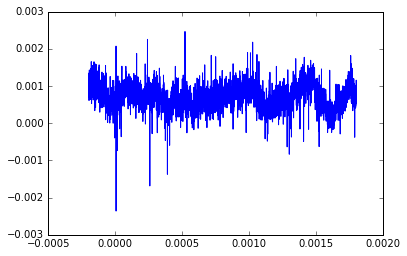

1.02375024428


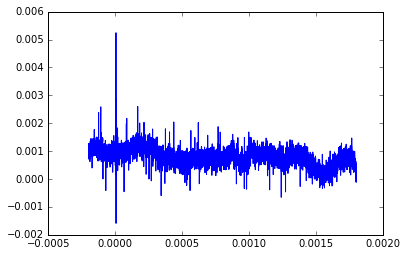

1.00251911887


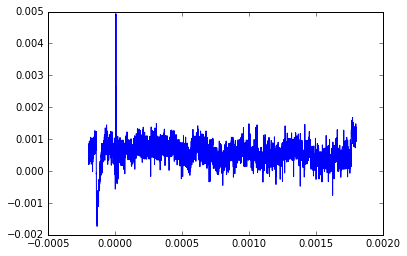

0.860209896445


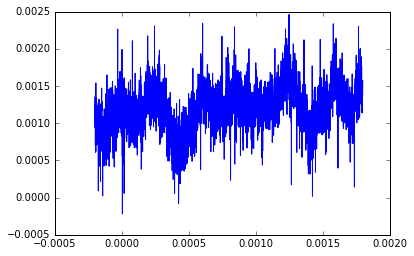

1.6448600633


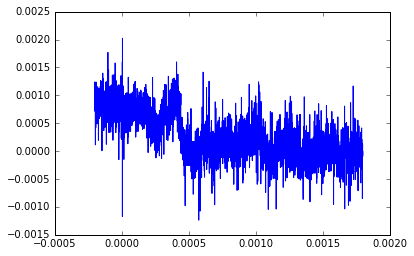

0.943587972641


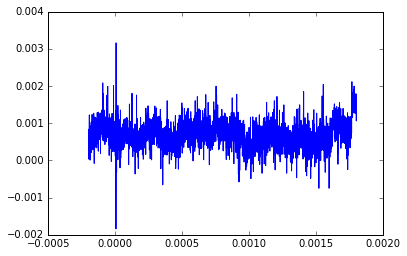

3.50107550928


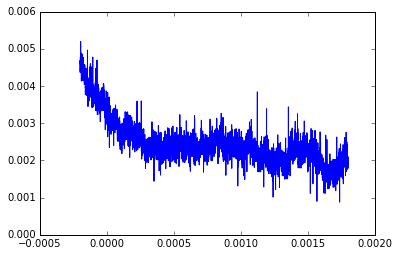

1.57912424287


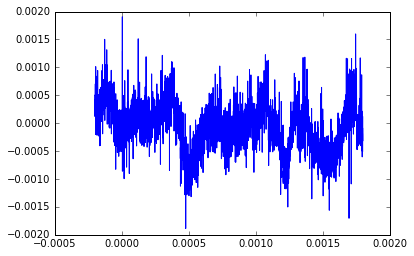

1.01863696168


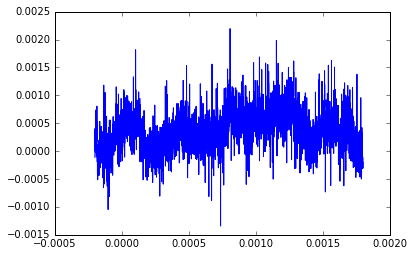

0.710717061734


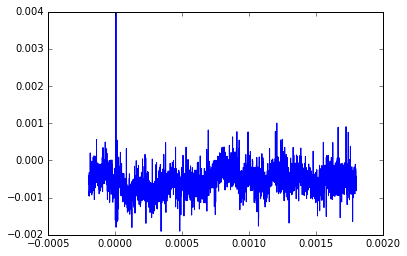

0.640277705525


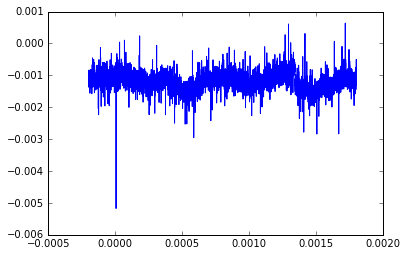

0.807586405256


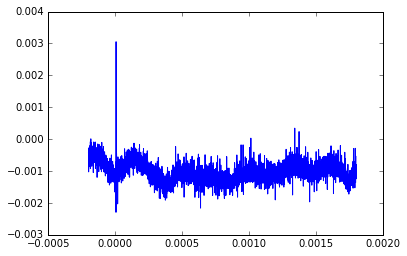

22.4937715197


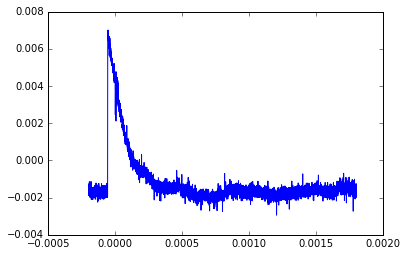

1.00863442687


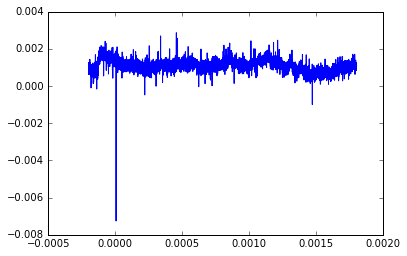

0.946181866262


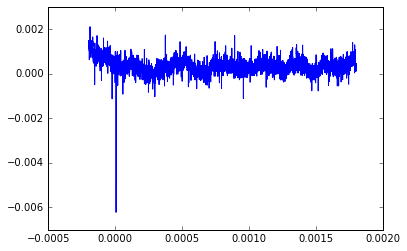

1.48148848566


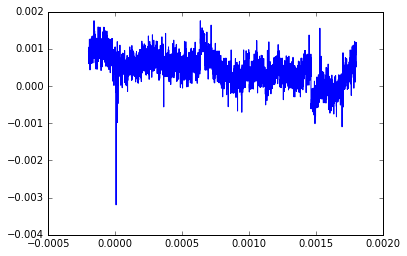

69.4670924038


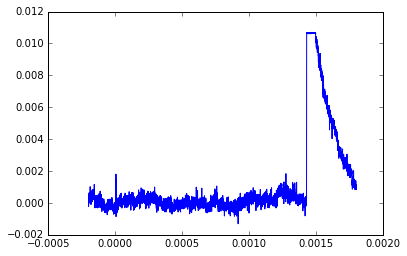

0.653346454349


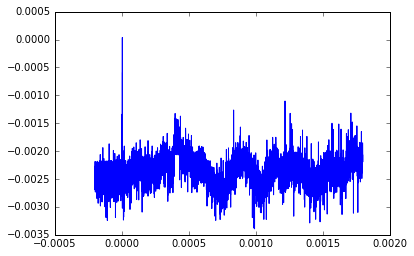

1.62593221116


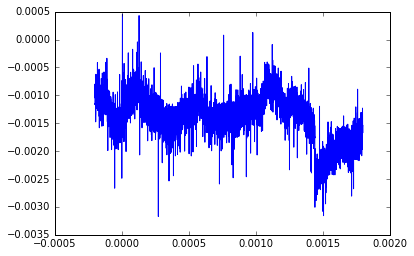

1.03211931095


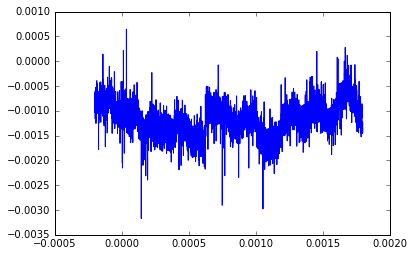

0.746453596205


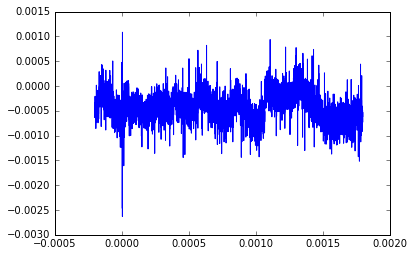

0.740596177816


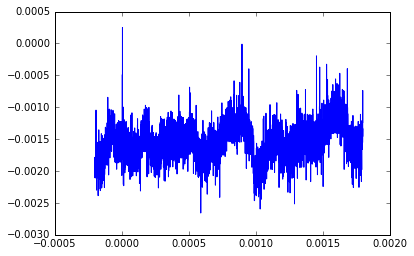

0.683507346538


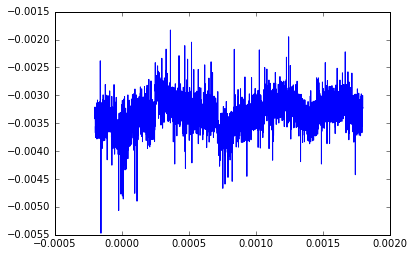

1.17941833889


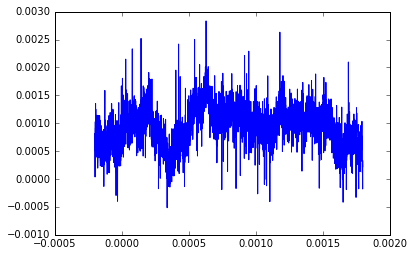

0.943432821991


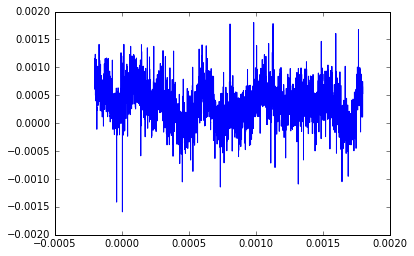

0.691498054294


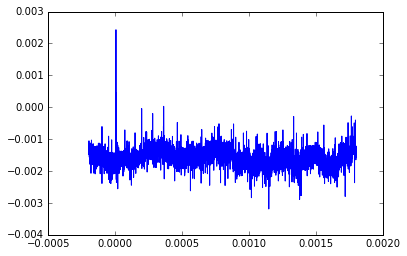

0.890382819734


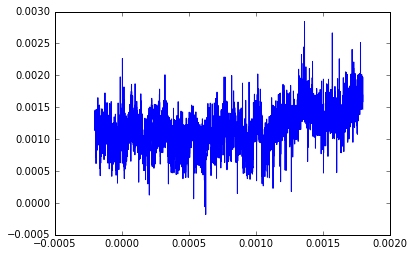

1.0107325626


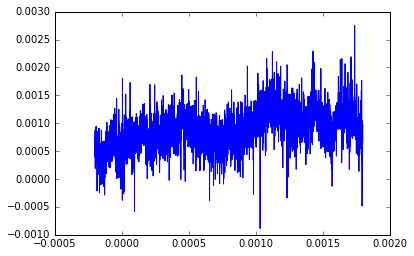

0.634239837245


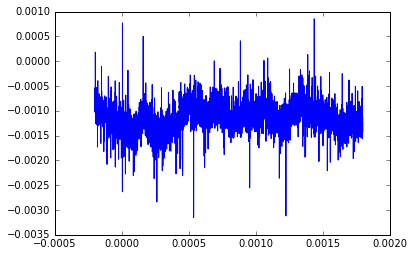

1.38219325985


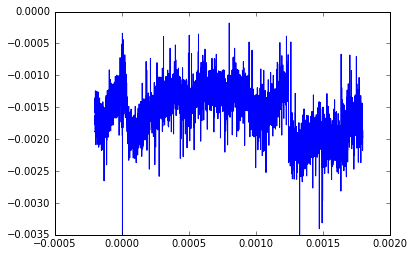

1.19031245561


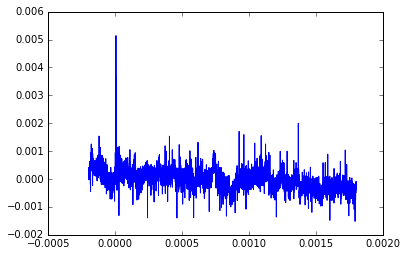

1.11953145242


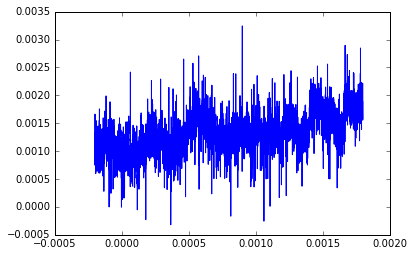

1.63324163805


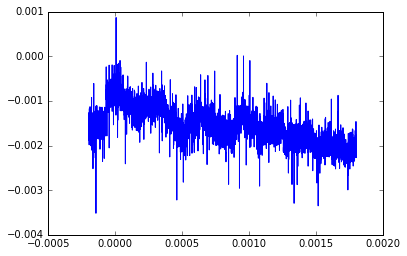

0.973128537207


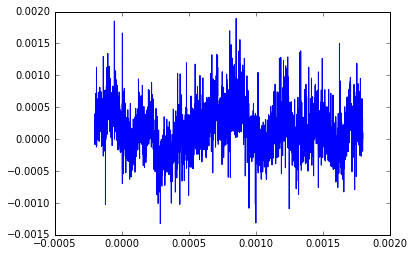

1.51707347022


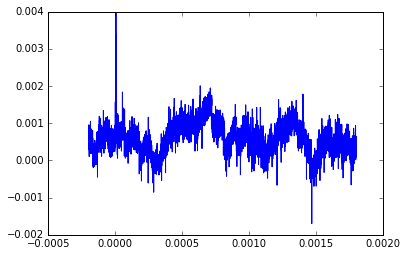

0.753369225724


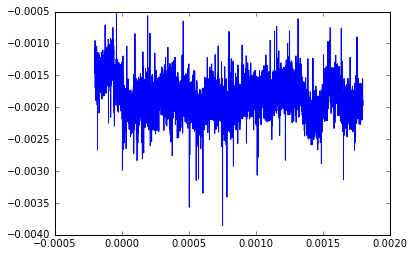

1.09837692528


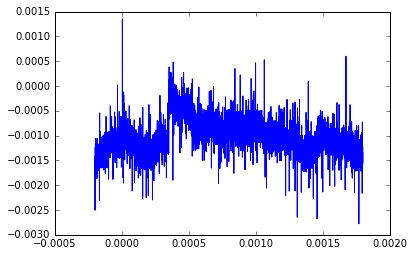

1.47766568805


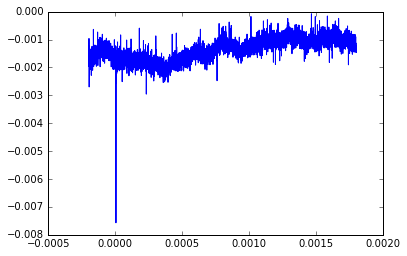

0.910933916599


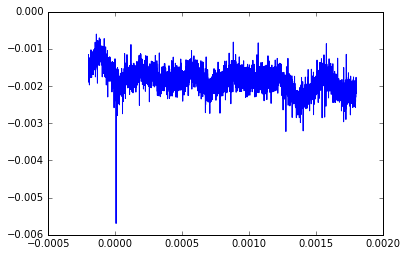

36.8334159189


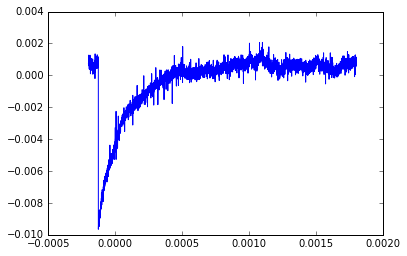

0.896223805534


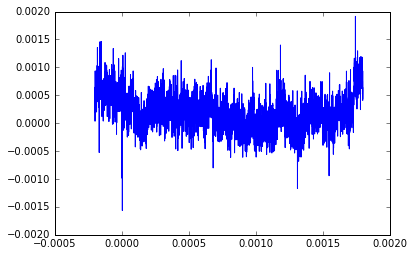

0.720007411428


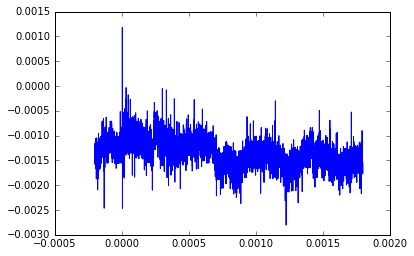

0.96307404692


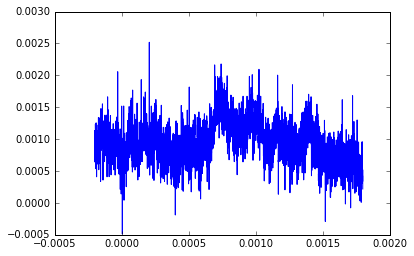

0.999185924363


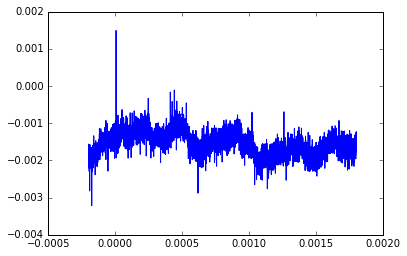

0.631759680682


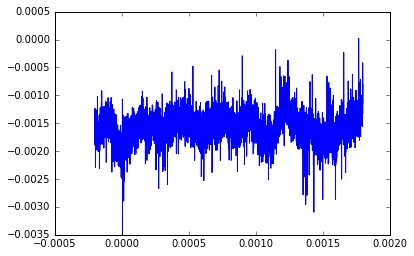

1.01725686768


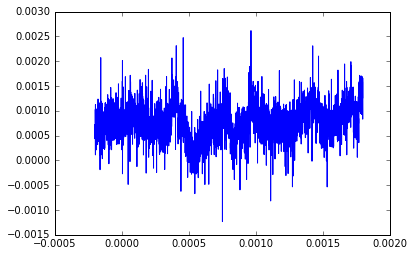

1.50997877667


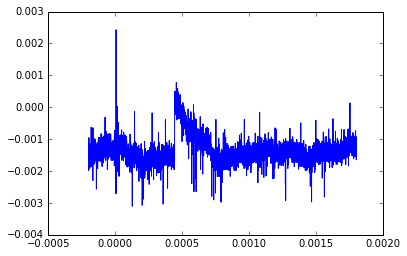

1.05527512077


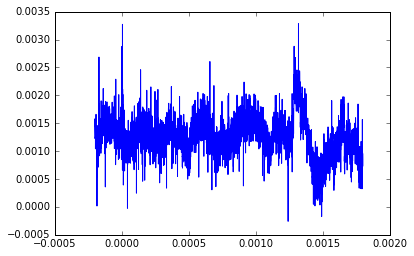

1.37209564527


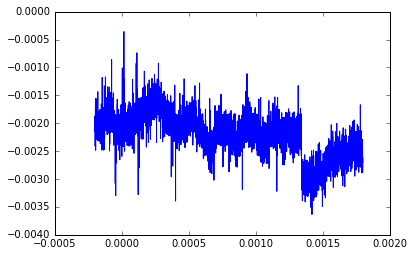

1.32119837474


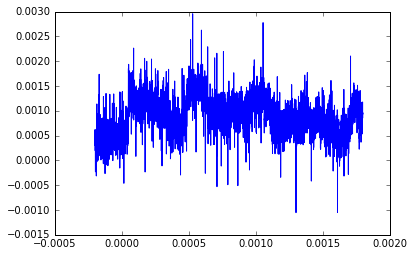

1.52795271657


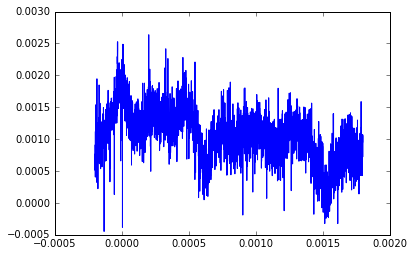

0.825245657379


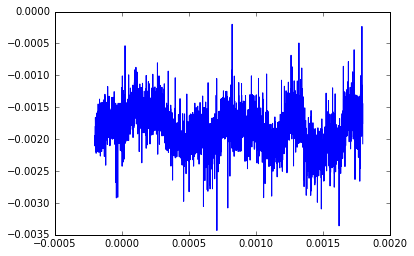

0.9938013641


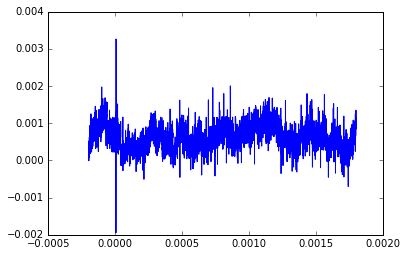

1.0794824091


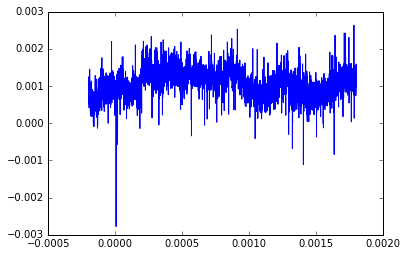

0.970803037575


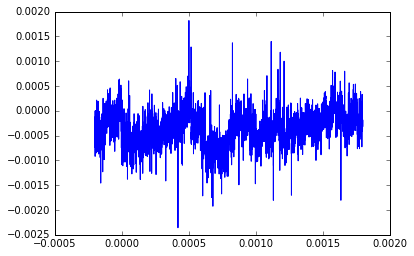

0.550181896338


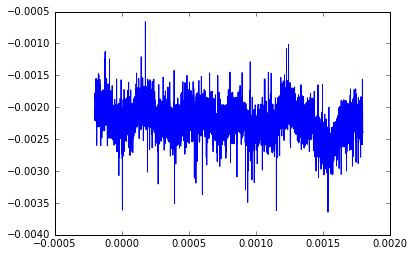

0.516124854317


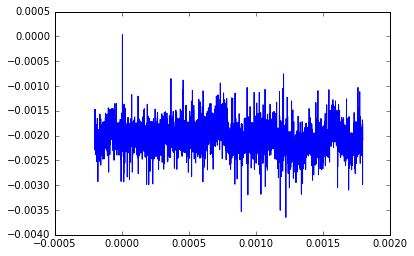

1.51448884146


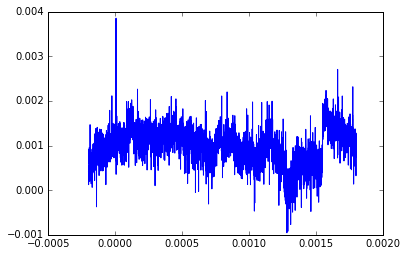

1.19095379208


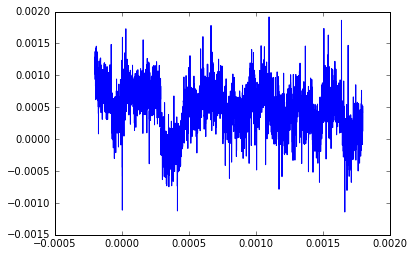

0.5325334969


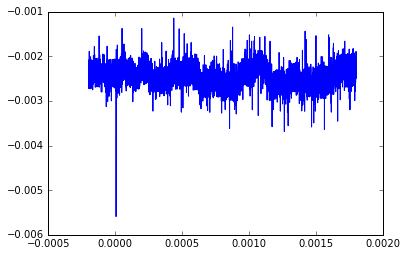

1.25138225308


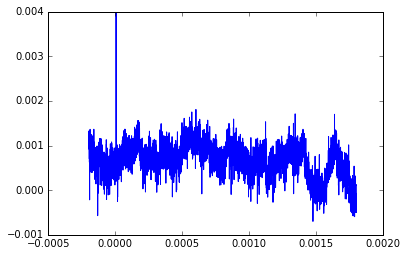

0.830192393514


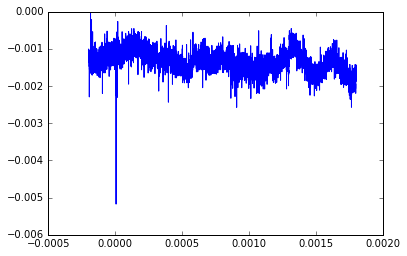

0.849814358951


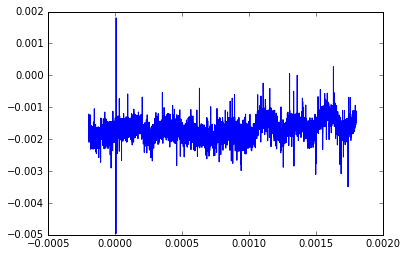

0.592983923984


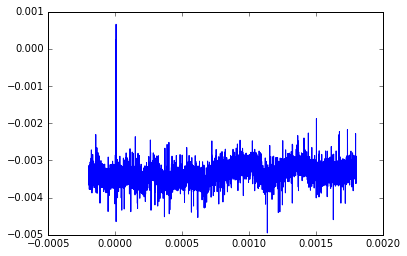

0.608938627689


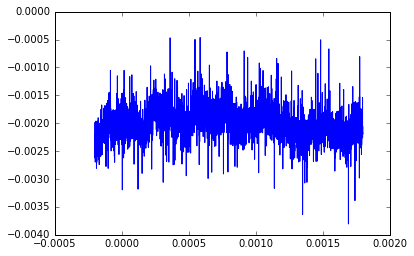

7.38783361446


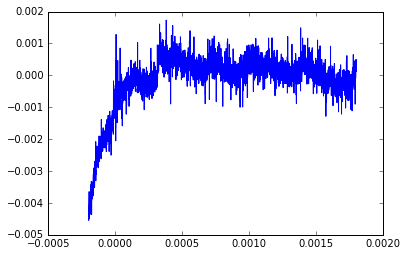

0.876906540282


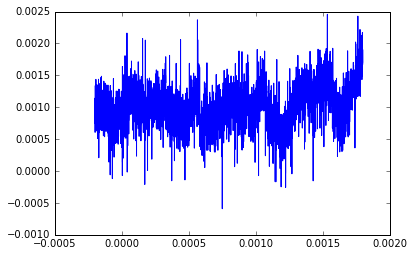

1.00566917239


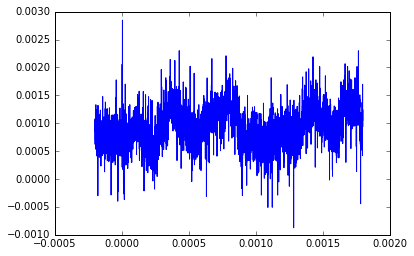

1.0908025216


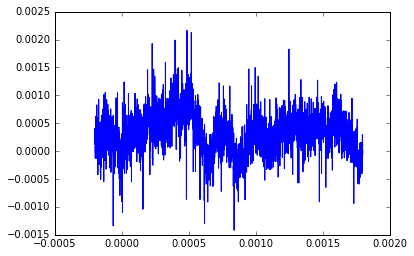

0.936463013933


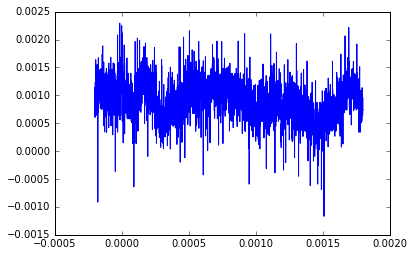

0.87304409123


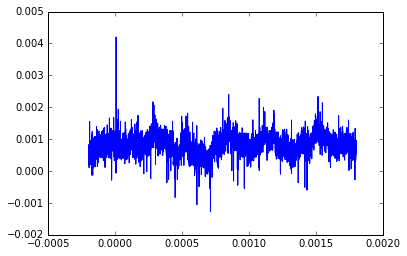

0.872643860197


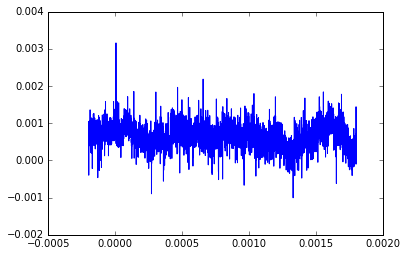

0.817292462131


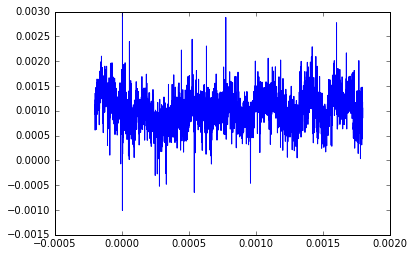

1.06408829273


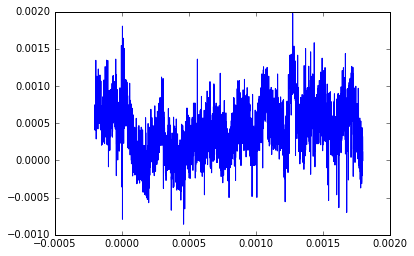

0.848982109564


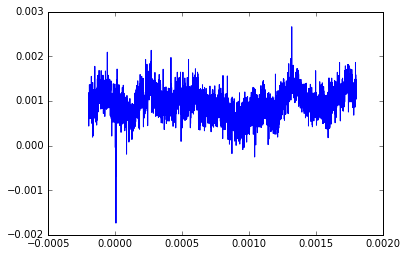

1.00920953621


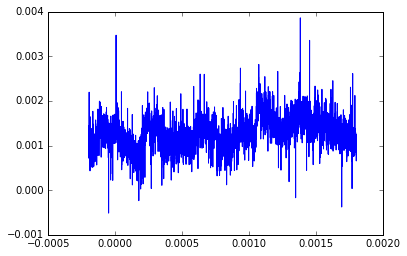

1.39104059871


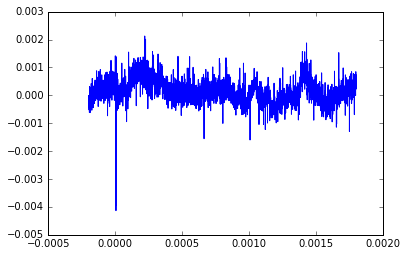

1.23304650765


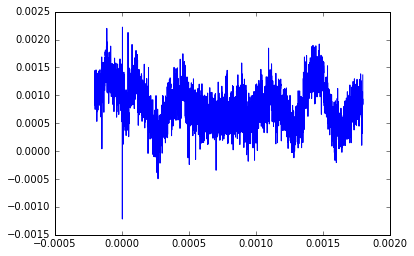

0.841727635397


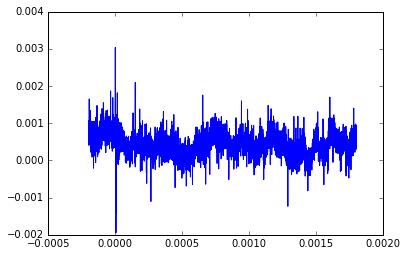

0.77141728977


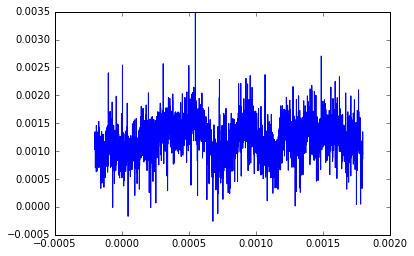

3.05308598289


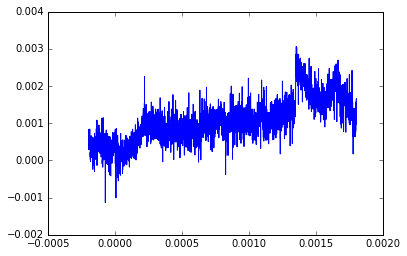

1.34734911671


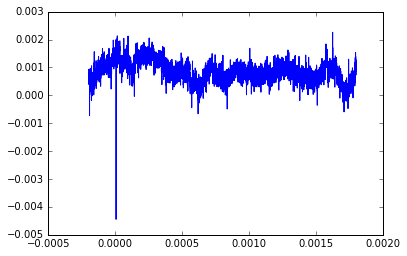

1.28698955038


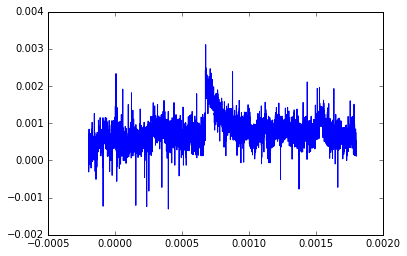

0.988635979365


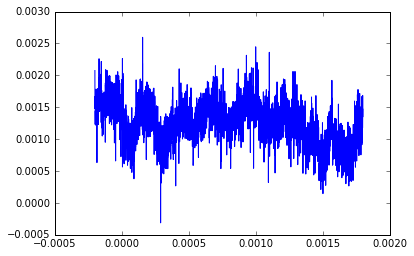

0.670608796415


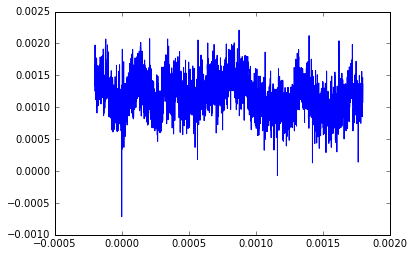

Sig avg 48


In [39]:
mm=[]
F=-1
files = os.listdir(folders[F])

FilesGold   = []
FilesSignal = []

for x in range(0,len(files)):
    if int(files[x][1]) ==4 or int(files[x][1]) ==2:
        FilesGold.append(files[x])
    if int(files[x][1]) ==3 or int(files[x][1]) ==1:
        FilesSignal.append(files[x])

X, Y, info = readTrc(folders[F]+FilesGold[0])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
for w in range(0,len(FilesSignal)):

    X, Y, info = readTrc(folders[F]+FilesGold[w])

    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
MSigY = Yvals/avg
MSigX = Xvals/avg


X, Y, info = readTrc(folders[F]+FilesGold[0])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,11):
for w in range(0,len(FilesGold)):

    X, Y, info = readTrc(folders[F]+FilesGold[w])

    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        CC = moving_average((MSigY-Y),1)
        xx = moving_average(X,1)
        EE = np.mean(CC)
        chiH = (CC-EE)**2
        chi = np.sum(chiH)*1000

        #coefs = poly.polyfit(xx, CC, 1)
        #ffit = poly.polyval(xx, coefs)
        #chi = abs(chisquare(CC, f_exp=ffit)[0])
        print(chi)
  
        plt.plot(xx,CC)
        #plt.plot(xx,ffit)

        plt.show()
        mm.append(chi)
        if chi <1:
            #mm.append(chi)
            Yvals += Y
            Xvals += X
            avg   += 1
SigY = Yvals/avg
SigX = Xvals/avg
print("Sig avg",avg)

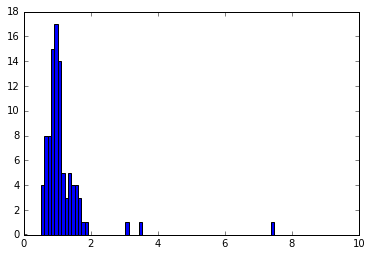

In [40]:
plt.hist(mm,bins=np.linspace(0,10,100))
plt.show()

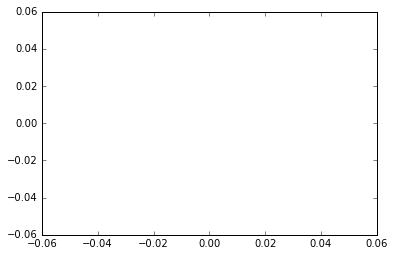

In [27]:
plt.plot(SigX,SigY)
#plt.plot(MSigX,MSigY)

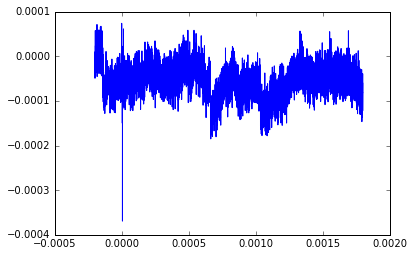

In [21]:
plt.plot(SigX,MSigY-SigY)
#plt.plot(MSigX,MSigY)

In [ ]:
plt.plot(MSigX[Trigger:T2],MSigY[Trigger:T2])

In [31]:
from scipy import stats
from scipy.stats import chisquare
import numpy.polynomial.polynomial as poly

#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [51]:
import numpy.polynomial.polynomial as poly

#coefs = poly.polyfit(x, y, 4)
#ffit = poly.polyval(x_new, coefs)

In [118]:
F=-1   #print(folders[F])
NAME = folders[F].split('/')[-2]
NAME

'Xe-100_P-11_E-350'

1.59319870069


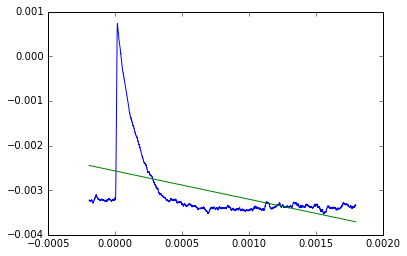

2.07394515314


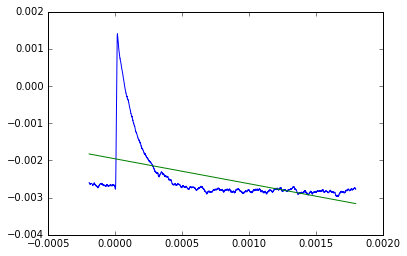

1.86227733331


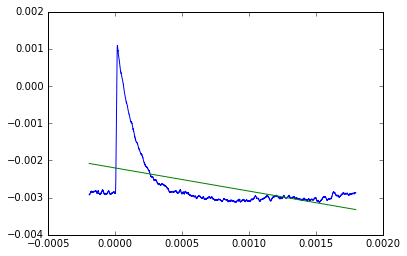

2.08670707061


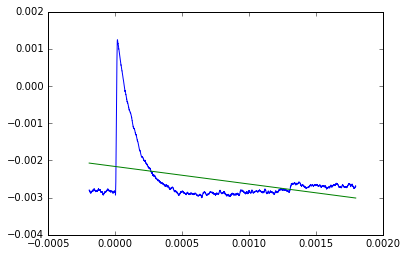

2.24482009357


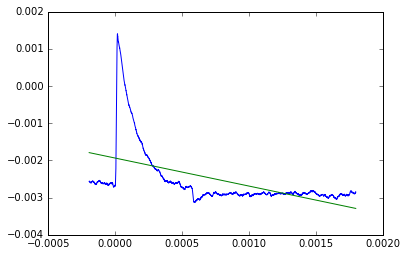

1.93249222689


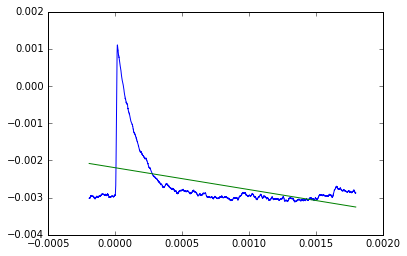

2.6374208537


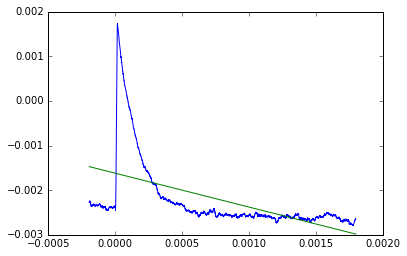

2.33139067277


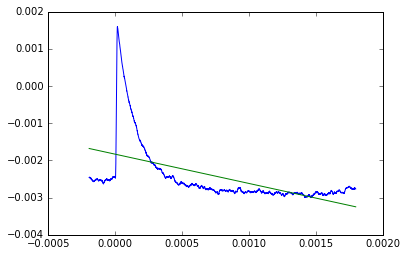

0.886550497891


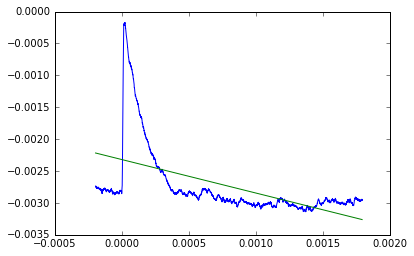

2.11794032577


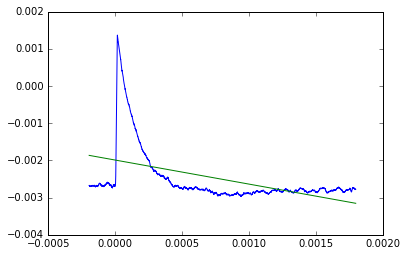

2.31385289709


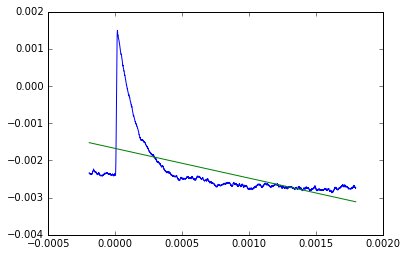

2.53862236793


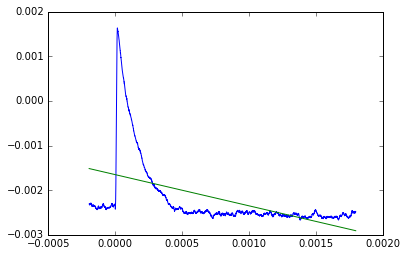

2.41054178587


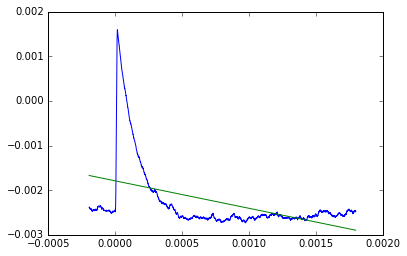

2.49792859844


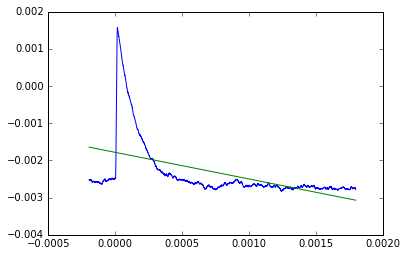

2.48296104797


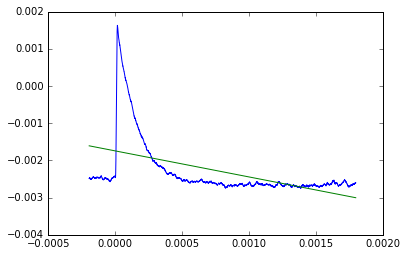

2.50639095287


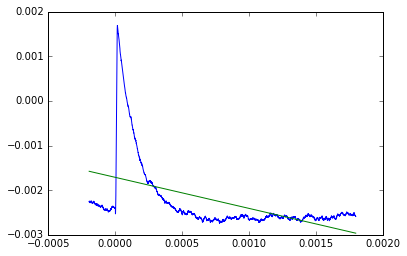

2.42355435578


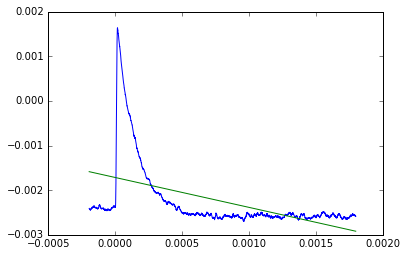

2.70183274177


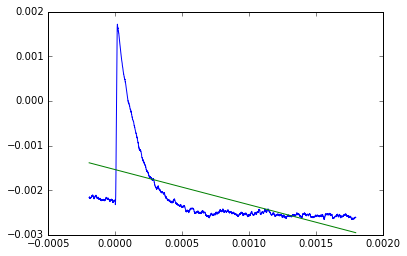

2.79584693264


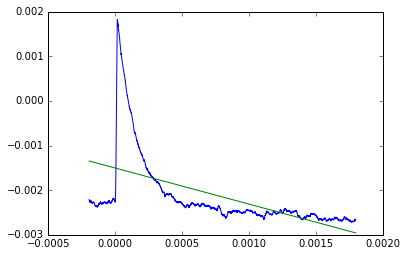

2.03889380209


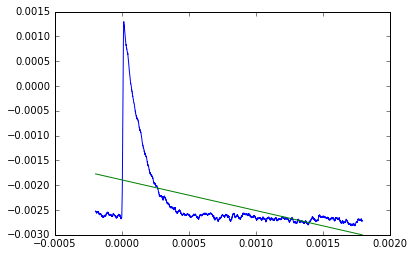

2.60723331347


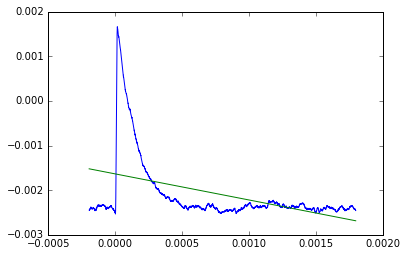

1.80735456653


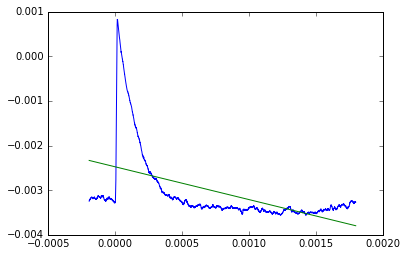

2.35952025226


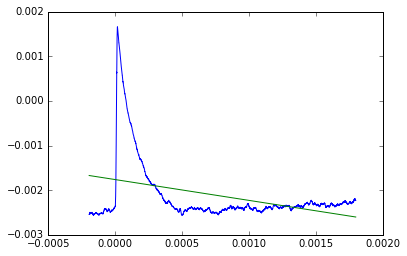

2.8028721124


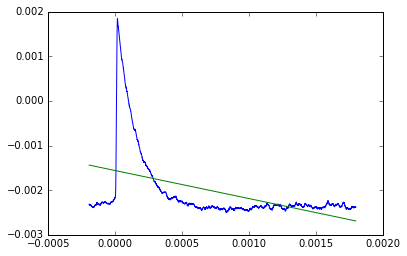

1.83359731129


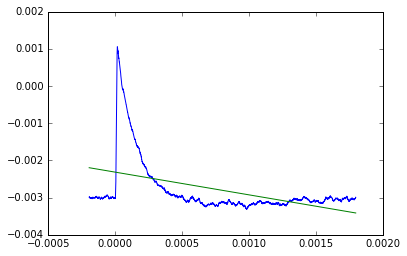

1.97906708268


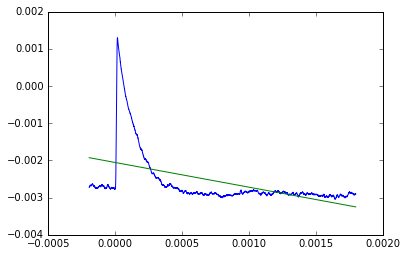

2.34463323003


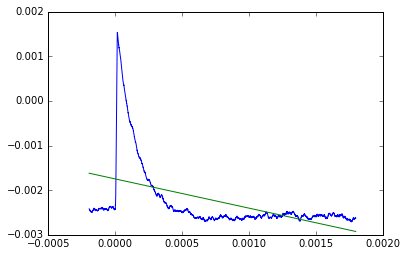

2.2206568276


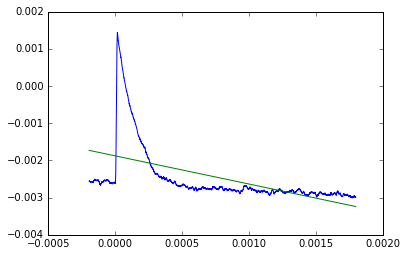

2.17154589175


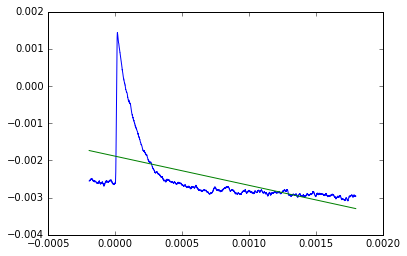

1.64517204559


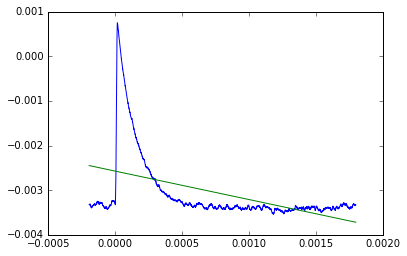

2.07911027393


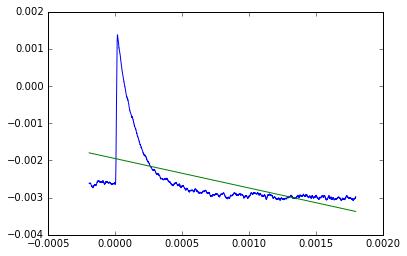

2.72017613323


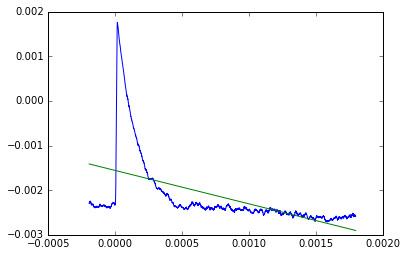

2.42626233618


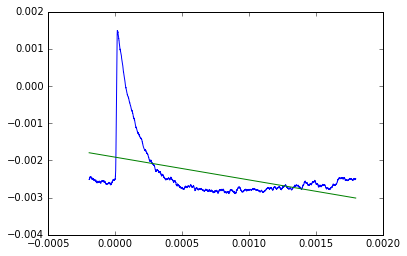

1.9342403025


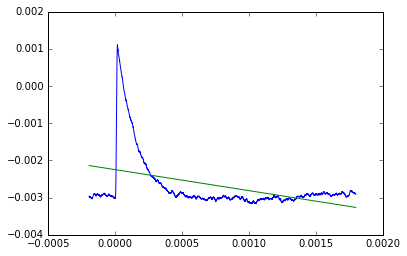

2.29465699199


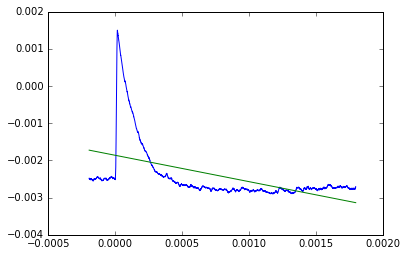

2.77506056034


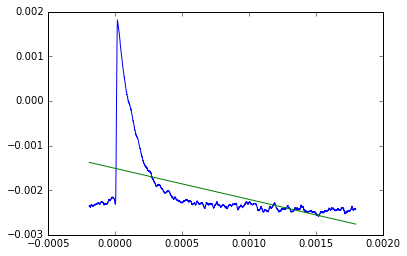

2.49881709986


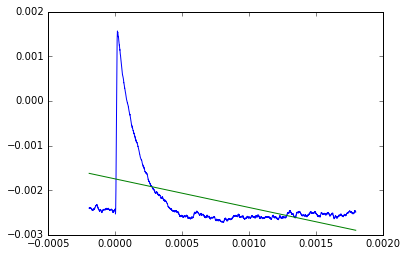

2.40220351049


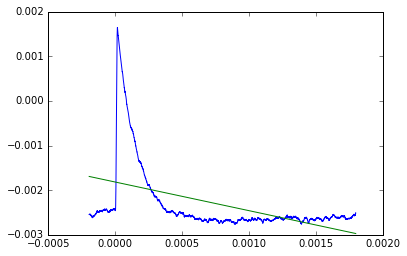

2.22565347272


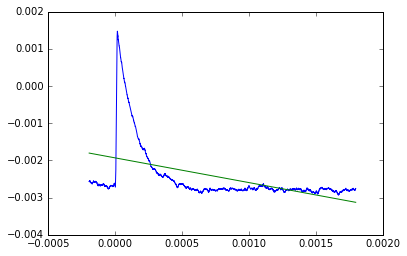

2.23275495067


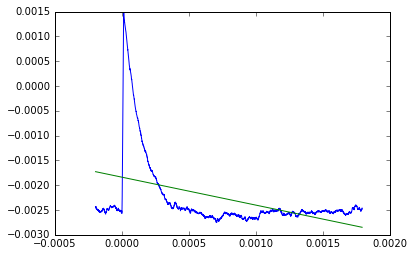

2.74331294906


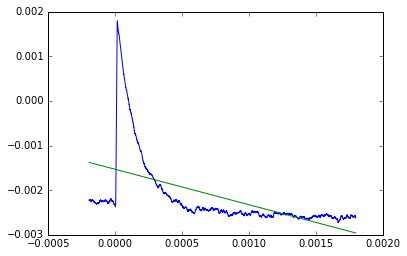

2.31801526109


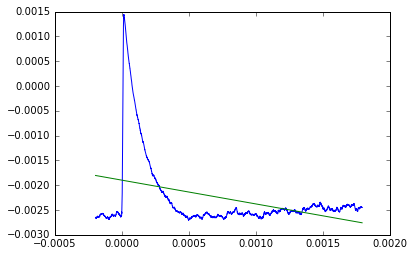

1.99345621569


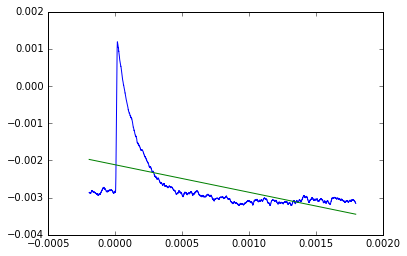

2.70213565425


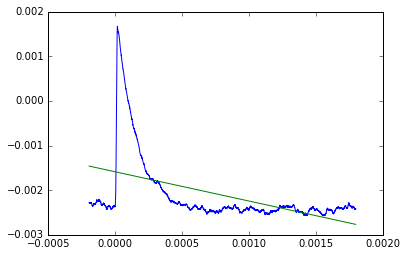

1.8847775154


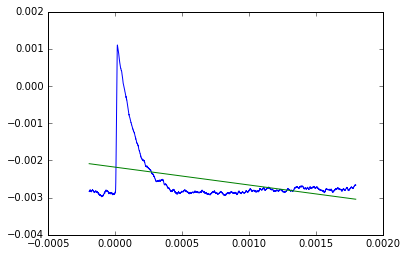

2.52423520064


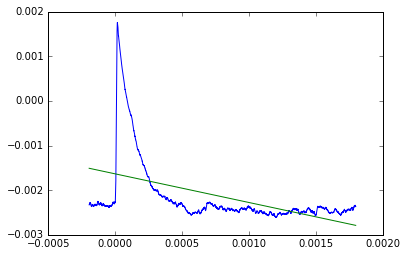

2.30009439961


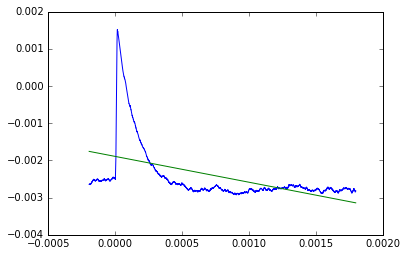

2.42231387061


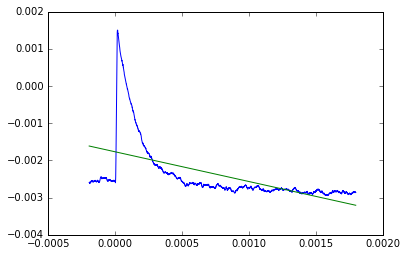

1.93997190792


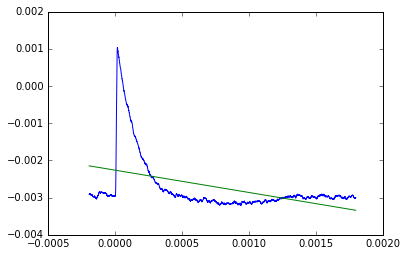

1.81106134428


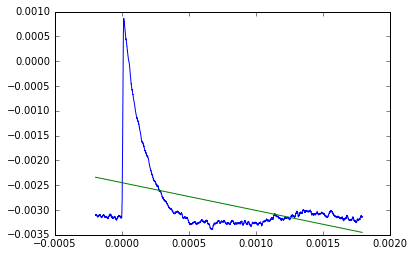

2.39909995141


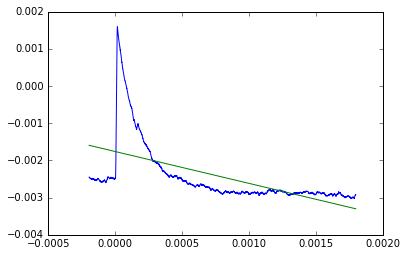

2.25391841667


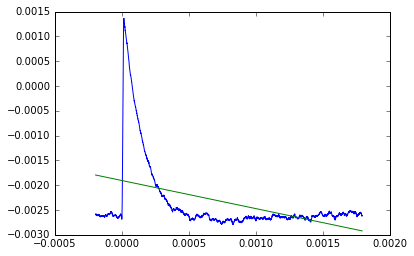

1.94953925482


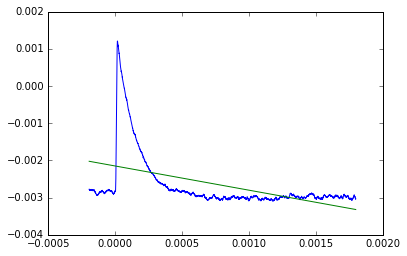

1.79572352538


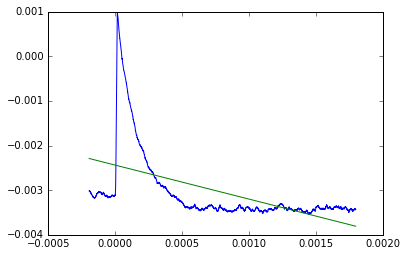

2.81006335865


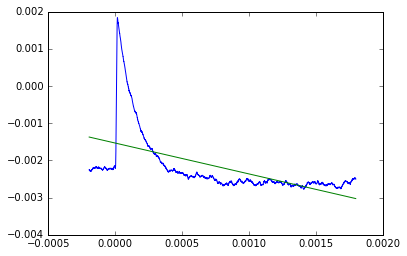

2.18793133858


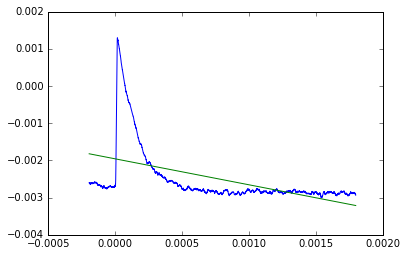

1.93777744177


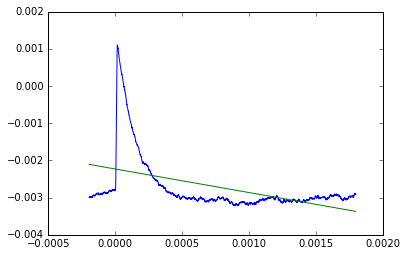

2.09151336381


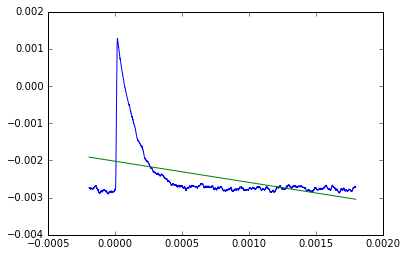

2.18664740954


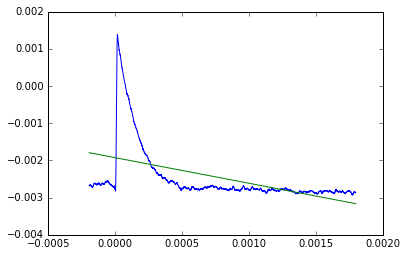

1.83411369721


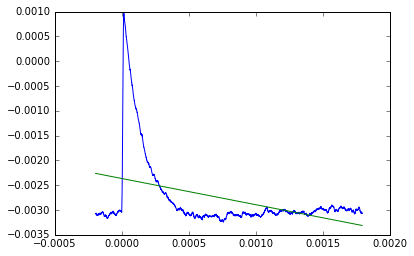

2.10460464736


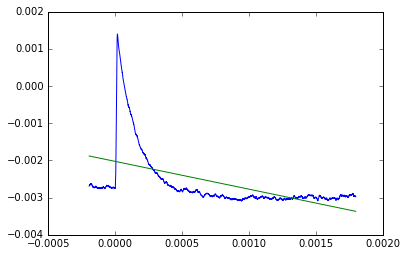

1.88104860711


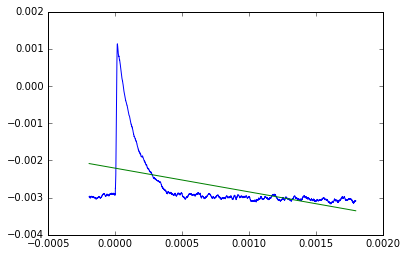

2.3417452473


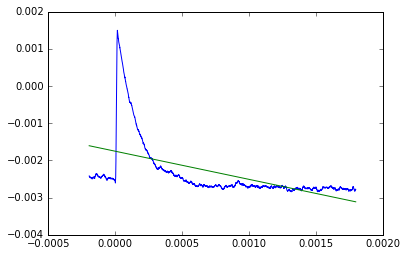

2.02738068925


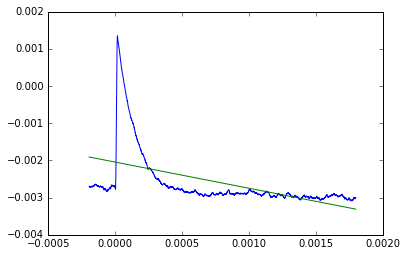

2.55787679314


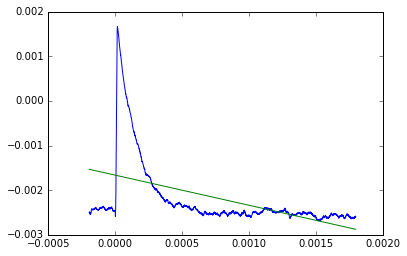

2.37388339268


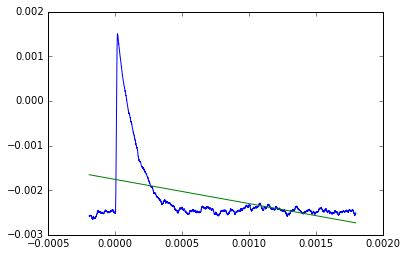

2.72039750757


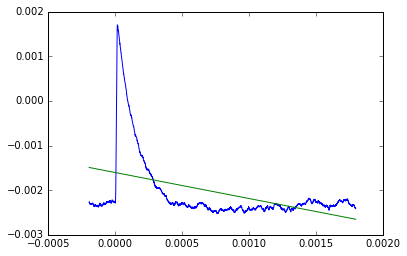

1.9002621648


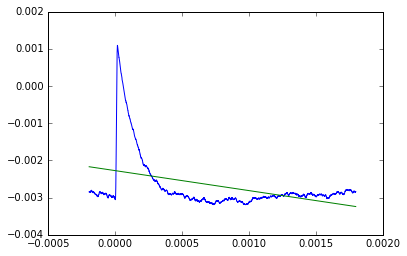

1.90135148518


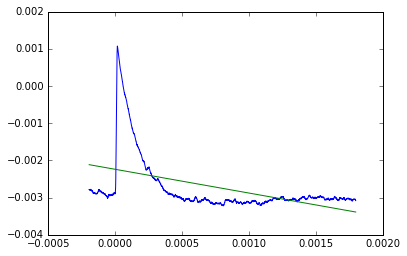

2.39832355298


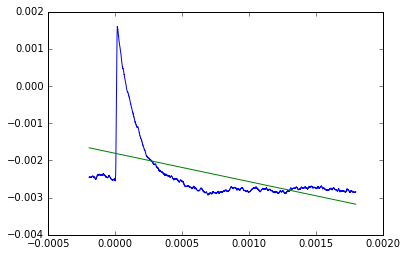

2.10149619518


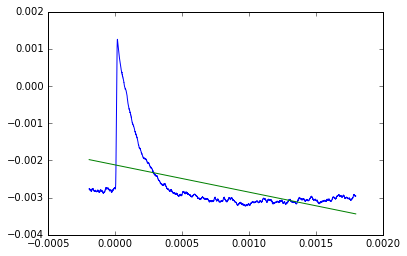

1.98060949797


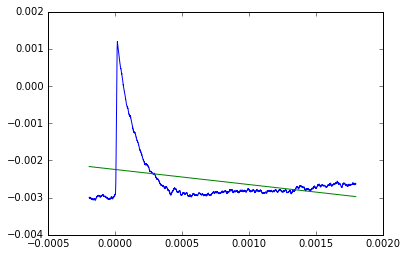

2.61623359267


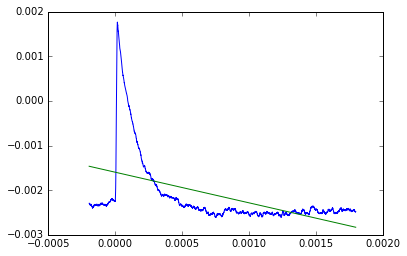

2.06859530512


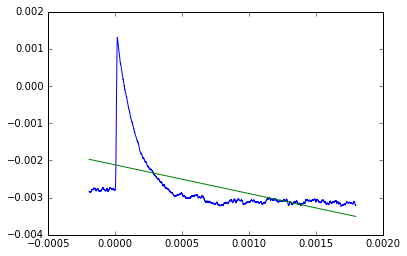

2.12223084352


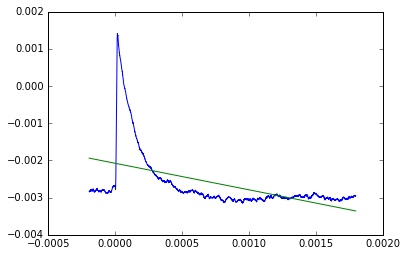

1.688332731


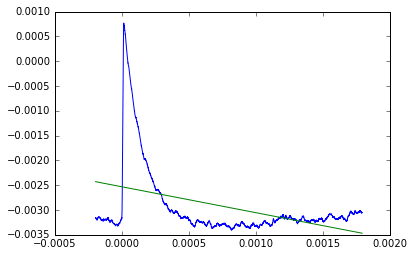

2.351827612


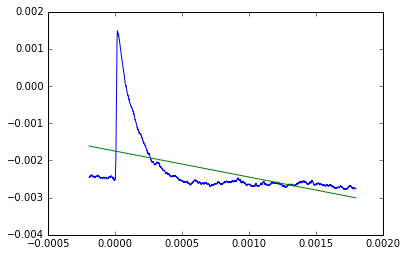

2.72305132706


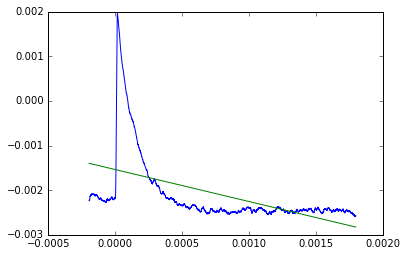

2.09950024347


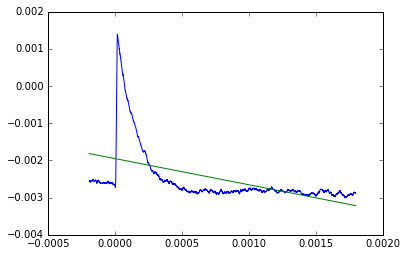

2.08970467379


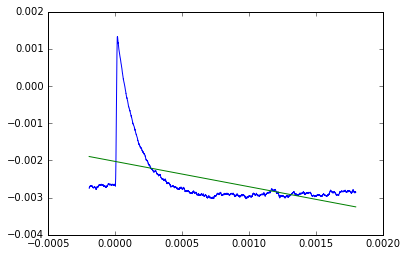

2.07428230219


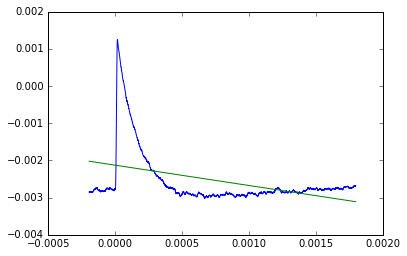

3.36282819238


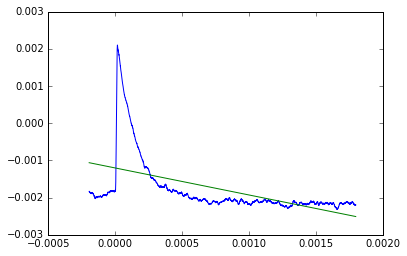

2.05998334933


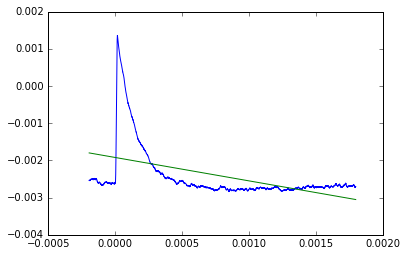

1.95351178399


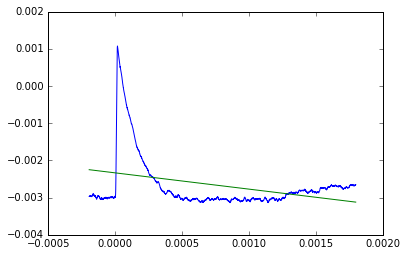

2.55712414649


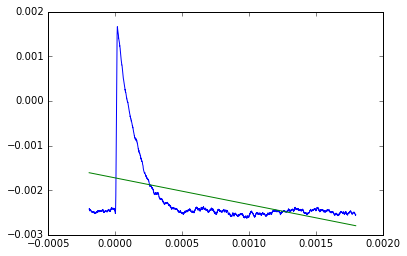

2.3706693208


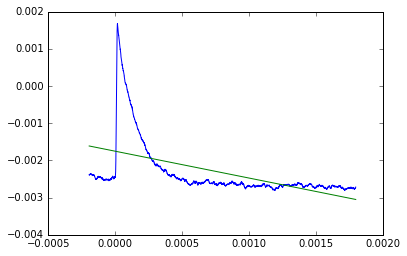

2.01990609702


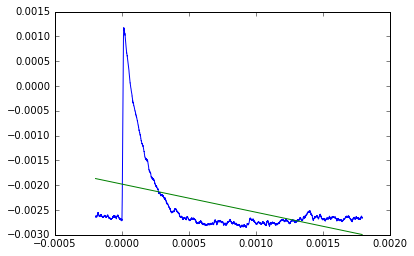

2.18254914655


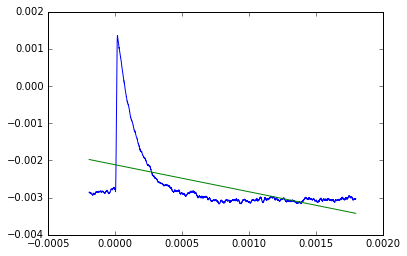

2.00576257252


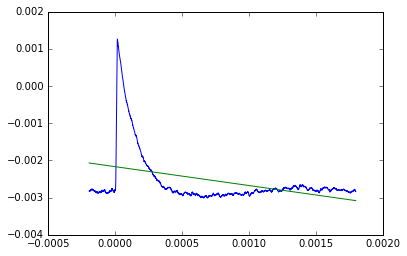

2.20100676537


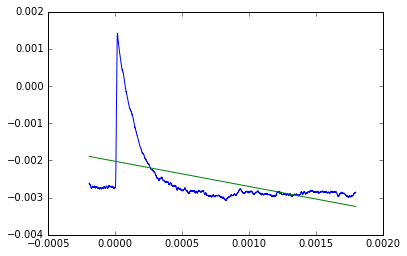

2.08639331939


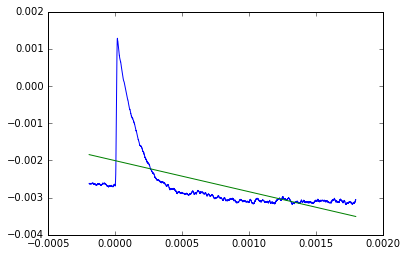

2.59983533282


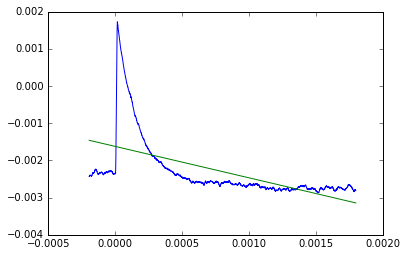

2.32985879763


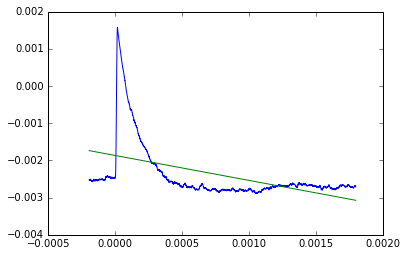

2.05875297767


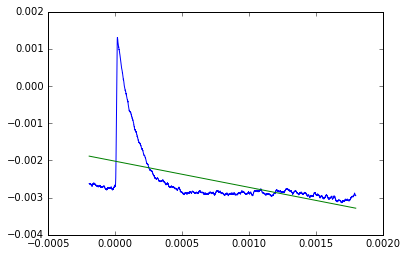

2.40080426225


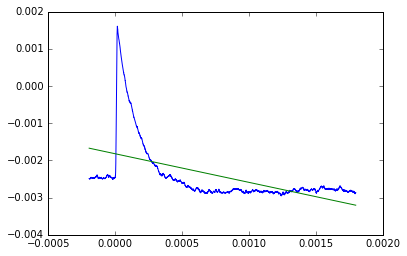

1.95047532885


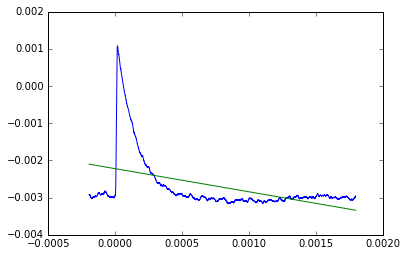

1.72344087732


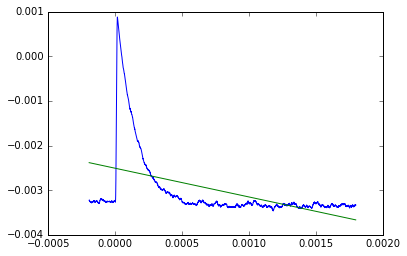

1.97015371683


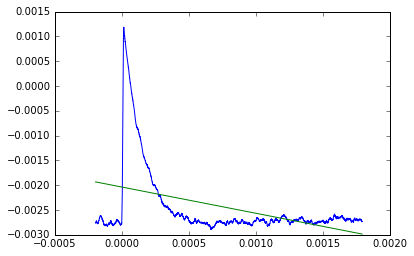

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in true_divide


In [187]:
F = 3
files = os.listdir(folders[F])

FilesGold   = []
FilesSignal = []

for x in range(0,len(files)):
    if int(files[x][1]) ==4 or int(files[x][1]) ==2:
        FilesGold.append(files[x])
    if int(files[x][1]) ==3 or int(files[x][1]) ==1:
        FilesSignal.append(files[x])
mm=[]

X, Y, info = readTrc(folders[F]+FilesGold[0])




avg = 0
for w in range(0,len(FilesGold)):

    X, Y, info = readTrc(folders[F]+FilesGold[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
MGolY = Yvals/avg
MGolX = Xvals/avg


X, Y, info = readTrc(folders[F]+FilesGold[0])  


Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,10):
for w in range(0,len(FilesGold)):
    X, Y, info = readTrc(folders[F]+FilesGold[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        CC = moving_average((MGolY-Y),50)
        xx = moving_average(X,50)
        coefs = poly.polyfit(xx, CC, 1)
        ffit = poly.polyval(xx, coefs)
        chi = abs(chisquare(CC, f_exp=ffit)[0])
        print(chi)
        plt.plot(xx,CC)
        plt.plot(xx,ffit)
        plt.show()
        mm.append(chi)

        if chi <0.5:
            #mm.append(chi)
            Yvals += Y
            Xvals += X
            avg   += 1
GGolY = Yvals/avg
GGolX = Xvals/avg

In [135]:
avg

10

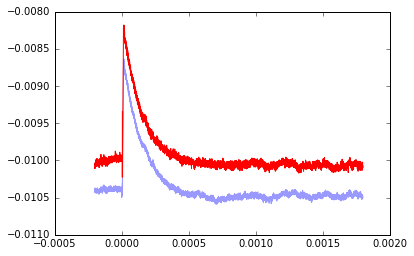

In [143]:
plt.plot(GolX,GolY,alpha=0.4)
plt.plot(GGolX,GGolY,color='r')


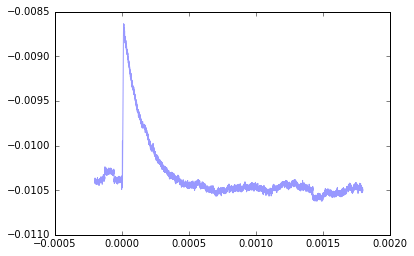

In [127]:
plt.plot(GolX,GolY,alpha=0.4)


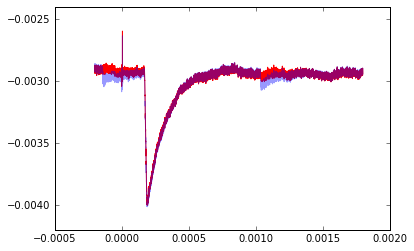

In [111]:
#SSigX3 =SSigX
#SSigY3 =SSigY

plt.plot(SSigX,SSigY,color='r')

plt.plot(SigX,SigY,alpha=0.4)


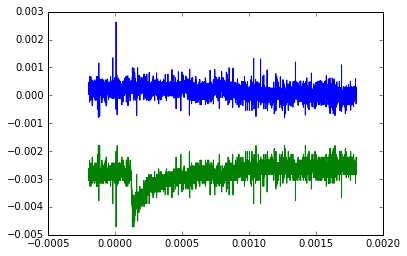

In [33]:
plt.plot(SigX,SigY-Y)
plt.plot(X,Y)

In [60]:
np.linspace(0,10,100)

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

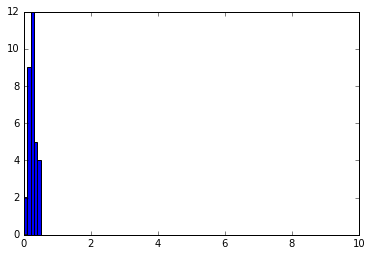

In [67]:
plt.hist(mm,bins=np.linspace(0,10,100))
plt.show()

In [20]:
mm

[-8.6632362833494268e-05,
 0.00021975424112255021,
 0.00025461184890802495,
 0.00037312979829514845,
 8.0292566233009722e-05,
 0.00013253211228975942,
 -0.0003242931365605732,
 -8.82501662337128e-06,
 -0.00033297889840493708,
 -0.00020411926854844507,
 0.00032684739345539653,
 -3.147673366352889e-05,
 -0.00029766304898738559,
 5.4912228565485995e-05,
 2.4605793353137199e-05,
 -0.00014938022268036764,
 -3.7635295054326122e-06,
 -3.7746312356942619e-05,
 -0.00030736943992137498,
 -0.00024426748426789683,
 0.00019483214508710325,
 0.00033430423455919092,
 -0.00047130538379683295,
 5.8796867855591195e-05,
 0.00020262225283240802,
 0.00031068396134214382,
 -3.118512535220732e-05,
 -0.00047495048768835256,
 2.4553720440401201e-05,
 3.4926644657411306e-05,
 -9.9775566008059282e-05,
 -0.00019659993994936746,
 4.0258910921577148e-05,
 3.4301769704579372e-05,
 -7.898118776670575e-06,
 -0.00025224505449905117,
 5.6422343034829847e-05,
 -0.00046374439686756652,
 3.6009761242320001e-05,
 0.00014491

In [5]:
AH = 3
files = os.listdir(folders[AH])
len(files)

200

In [6]:
FilesGold   = []
FilesSignal = []

for x in range(0,len(files)):
    if int(files[x][1]) ==4 or int(files[x][1]) ==2:
        FilesGold.append(files[x])
    if int(files[x][1]) ==3 or int(files[x][1]) ==1:
        FilesSignal.append(files[x])

In [8]:
X, Y, info = readTrc(folders[AH]+FilesSignal[0])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,1100):
for w in range(0,len(FilesSignal)):

    X, Y, info = readTrc(folders[AH]+FilesSignal[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
SigY = Yvals/avg
SigX = Xvals/avg

X, Y, info = readTrc(folders[AH]+FilesGold[0])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,1100):
for w in range(0,len(FilesGold)):
    X, Y, info = readTrc(folders[AH]+FilesGold[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
GolY = Yvals/avg
GolX = Xvals/avg

In [17]:
TriggerTime = find_nearest(SigX,0)
Trigger     = np.where(SigX==TriggerTime)[0][0]
baselineS    = np.mean(SigY[0:Trigger])
baselineG    = np.mean(GolY[0:Trigger])
data = [GolX, GolY-baselineG, SigY-baselineS]
np.savetxt(PATH+"test"+'.txt',data)

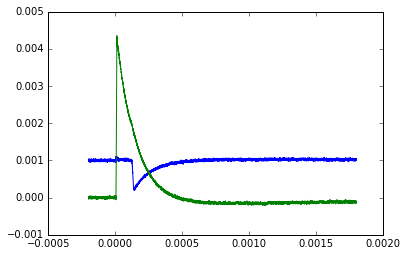

In [21]:
plt.plot(GolX,SigY-baselineS+0.001)
plt.plot(GolX,GolY-baselineG)

In [5]:
AH = 3
Fold = folders[AH].split('/')[-2]
cut = Fold+'/'



files = os.listdir(folders[AH])
#files.remove('.DS_Store')
int(files[4][1])

4

In [6]:
Fold

'250'

In [8]:
FilesGold   = []
FilesSignal = []

for x in range(0,len(files)):
    if int(files[x][1]) ==4 or int(files[x][1]) ==2:
        FilesGold.append(files[x])
    if int(files[x][1]) ==3 or int(files[x][1]) ==1:
        FilesSignal.append(files[x])

In [9]:
X, Y, info = readTrc(folders[AH]+FilesSignal[0])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,1100):
for w in range(0,len(FilesSignal)):

    X, Y, info = readTrc(folders[AH]+FilesSignal[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
SigY = Yvals/avg
SigX = Xvals/avg

In [10]:
avg

93

In [11]:
TriggerTime = find_nearest(SigX,0)
Trigger     = np.where(SigX==TriggerTime)[0][0]
baseline    = np.mean(SigY[0:Trigger])
data = [SigX,SigY-baseline]
np.savetxt('/Users/austinmcdonald/Desktop/Xenon-11bar-test/'+"Sig-"+Fold+'.txt',data)

In [12]:
X, Y, info = readTrc(folders[AH]+FilesGold[1])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,1100):
for w in range(0,len(FilesGold)):
    X, Y, info = readTrc(folders[AH]+FilesGold[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
GolY = Yvals/avg
GolX = Xvals/avg

In [13]:
avg

93

In [14]:
TriggerTime = find_nearest(GolX,0)
Trigger     = np.where(GolX==TriggerTime)[0][0]
baseline    = np.mean(GolY[0:Trigger])
data = [GolX,GolY-baseline]
np.savetxt('/Users/austinmcdonald/Desktop/Xenon-11bar-test/'+"Gol-"+Fold+'.txt',data)

In [44]:
for q in range(3,4):
    files = os.listdir(folders[q])
    Name = folders[q].split('/')[-2]
    N = len(files)
    
    X, Y, info = readTrc(folders[q]+files[0])
    
    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    for w in range(0,N):
        X, Y, info = readTrc(folders[q]+files[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            Yvals += Y
            Xvals += X
            avg   += 1
    Yvals = Yvals/avg
    Xvals = Xvals/avg
    TriggerTime = find_nearest(Xvals,0)
    Trigger     = np.where(Xvals==TriggerTime)[0][0]
    baseline    = np.mean(Yvals[0:Trigger])
    data = [Xvals,Yvals-baseline]
    np.savetxt(PATH+Name+'.txt',data)
    
    

In [26]:
Yvals

array([ 0.01477493,  0.01506118,  0.01478548, ...,  0.01492791,
        0.01496623,  0.01486933])

In [ ]:
files = os.listdir()
#files.remove('.DS_Store')


In [ ]:
len(files)

In [ ]:
N = len(files)
Yvals = np.zeros(50e3+2)
Xvals = np.zeros(50e3+2)

for q in range(0,N):
    X, Y, info = readTrc(files[q])
    #Y = np.array(Y)
    Yvals += Y
    Xvals +=X
Yvals = Yvals/N
Xvals = Xvals/N

In [ ]:
find_nearest(Xvals,0)

In [ ]:
TriggerTime = find_nearest(Xvals,0)
Trigger     = np.where(Xvals==TriggerTime)[0][0]
baseline    = np.mean(Yvals[0:Trigger])
baseline

In [ ]:
plt.plot(Xvals,Yvals-baseline)

In [ ]:
data = [Xvals,Yvals-baseline]

In [ ]:
path = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
np.savetxt(path+'050-clean.txt',data)

In [ ]:
AA = np.loadtxt(path+'200clean.txt')
